<h3>Lấy dữ liệu ảnh đầu vào</h3>

In [1]:
# import các thư viện cần thiết
import numpy as np
import cv2
import matplotlib.pyplot as plt

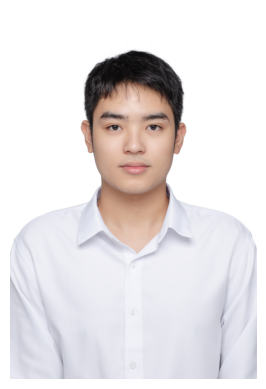

In [2]:
# Đọc và hiển thị ảnh đầu vào
img_color = cv2.imread('Hau.jpg', cv2.IMREAD_COLOR)

if img_color is None:
    print("Error loading image.")
else:
    img_color = cv2.resize(img_color, (0,0), fx=0.5, fy=0.5)
    
    # Chuyển đổi từ BGR sang RGB để hiển thị đúng màu bằng Matplotlib
    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh màu bằng Matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Tắt hiển thị trục
    plt.show()

<h3>Ảnh đầu vào sau khi qua một phép nhân tích chập</h3>

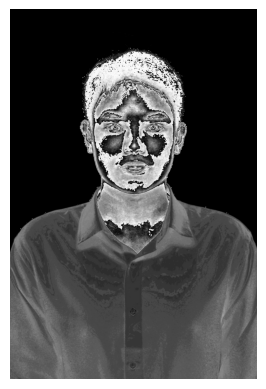

In [4]:
# Thao tác phép nhân tích chập với ảnh
def conv_multi(img, filter):
    h, w, c = img.shape
    fh, fw, c = filter.shape
    
    output = np.zeros((h - fh + 1, w - fw + 1))
    
    # Thực hiện phép tích chập
    for i in range(h - fh + 1):
        for j in range(w - fw + 1):
            output[i, j] = np.sum(img[i:i+fh, j:j+fw, :] * filter)
    
    return output

# Tạo một filter 3x3x3
filter = np.array([
    [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
    [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
    [[1, 0, -1], [1, 0, -1], [1, 0, -1]]
])
conv_multi_img = conv_multi(img_color, filter)
conv_multi_img = conv_multi_img.astype(np.uint8)

plt.imshow(cv2.cvtColor(conv_multi_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

<h3>Ảnh đầu vào sau khi qua một lớp MaxPooling</h3>

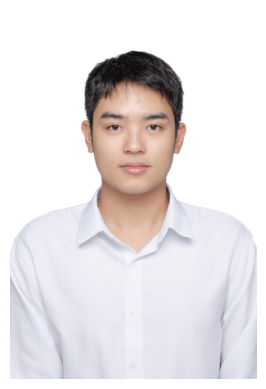

In [5]:
# Thao tác pooling với ảnh đầu vào
def max_pooling_2x2(image):
    (h, w, c) = image.shape
    # Ensure the image dimensions are divisible by 2
    h = (h // 2) * 2
    w = (w // 2) * 2
    pooled_image = np.zeros((h // 2, w // 2, c), dtype=image.dtype)

    for i in range(0, h, 2):
        for j in range(0, w, 2):
            for k in range(c):
                pooled_image[i // 2, j // 2, k] = np.max(image[i:i + 2, j:j + 2, k])
    
    return pooled_image

pooled_image = max_pooling_2x2(img_color)
pooled_image = pooled_image.astype(np.uint8)

plt.imshow(img_color )
plt.imshow(cv2.cvtColor(pooled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

In [13]:
print(img_color.shape)
print(pooled_image.shape)

(1772, 1181, 3)
(886, 590, 3)
